In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autograd import grad, jacobian
from decimal import Decimal

### 1.1 Numerical Optimization
Let $f(x)$ be a scalar function of a vector of variables $x \in \mathbb{R}^n$. Numerical optimization is the minimization or maximization of $f(x)$ subject to constraints on $x$.The $f(x)$ is a scalar function known as objective function and the continuous components $x_i \in x$ are called decision variables.

The optimization problem is formulated as:

\begin{align}
\underset{x\in\mathbb{R}^n}{\min}f(x)
\end{align}

Subject to:\
$\quad\array{
g_k(x) \leq 0 & k=1,2,\cdots,m\\
h_k(x) = 0, & k=1,2,\cdots,r\\
m,r \leq n
}$

The functions $g_k(x)$ and $h_k(x)$ are scalar similar to $f(x)$ and are called ***constraint functions*** which define specific equations and/or inequalities $x$ should satisfy.


### 1.2 Solution
**Definition 1.2.1** A solution to $f(x)$ is a point $x^*$ which denotes the optimum vector that solves (1.1) corresponding to the optimum value of $f(x^*)$

In case of minimization problem, the optimum vector $x^*$ is referred to as the global minimizer of $f$ and attains the least possible value at $x^*$. To design an algorithm that finds out the global minimizer for a function is quite difficult as in mode cases we do not have an idea of the overall shape of f.Mostly our knowledge is restricted to a local portion of $f$.

**Definition 1.2.2** A point $x^*$ is called global minimizer of $f$ if $f(x^*) \leq f(x) \text{ for all } x$.

**Definition 1.2.3** A point $x^*$ is call a local minimizer of $f$ if there a neighborhood $\mathcal{N}$ of $x^*$ such that $f(x^*) \lt f(x)$ for all $x \in \mathcal{N}$.

**Definition 1.2.4** A point $x^*$ is call a strong local minimizer of f if there is a neighborhood $\mathcal{N}$  of $x^*$ such that $f(x^*) \lt f(x)$ for all $x \in \mathcal{N}$ with $x\ne x^*$.

**Definition 1.2.5** For an object function $f(x)$ where $x\in\mathbb{R}^2, a point x^s=\left[\array{x_1^s\\x_2^s}\right]$ is called a ***saddle point*** if for all $x$, there exists an $\epsilon > 0$ such that following conditions are satisfied:

- $\frac{\partial f}{\partial x_1}(x)|_{(x_1^s,x_2^s)} \lt 0$
- $\frac{\partial f}{\partial x_2}(x)|_{(x_1^s,x_2^s)} \lt 0$
- $\left[\frac{\partial^2 f}{\partial^2 x_1}(x) \frac{\partial^2 f}{\partial^2 x_2}(x) - \left(\frac{\partial^2 f}{\partial^2 x_1 \partial^2 x_2}(x)\right)^2\right]\bigg|_{x_1^sx_2^s} < 0$\

generating these chain of inequalities:

$f(x)|_{x_1,x_2^s} \leq f(x)|_{x_1^s,x_2^s} \leq f(x)|_{x_1^s,x_2}$

Example of saddle point are shown in the following graphs:

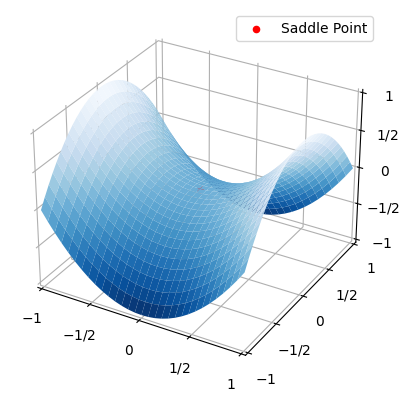

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_args = {'rstride': 1, 'cstride': 1, 'cmap':"Blues_r",
             'linewidth': 0.4, 'antialiased': True,
             'vmin': -1, 'vmax': 1}

x, y = np.mgrid[-1:1:31j, -1:1:31j]

# Objective function
z = x**2 - y**2
ax.plot_surface(x, y, z, **plot_args)
ax.scatter([0],[0],[0],color="red",s=20, label="Saddle Point")
ax.view_init(azim=-60, elev=30)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.xticks([-1, -0.5, 0, 0.5, 1],
           [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
plt.yticks([-1, -0.5, 0, 0.5, 1],
           [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticklabels([r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.legend()
plt.show()

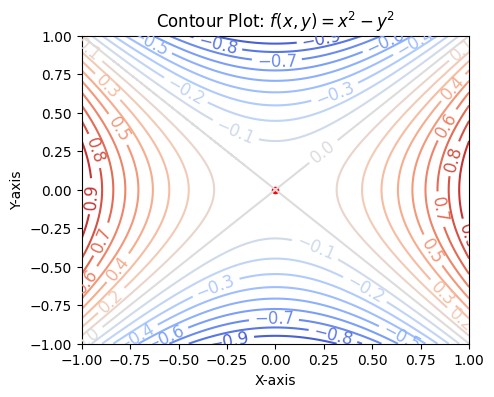

In [33]:
# Objective function
f = lambda x,y: x**2 - y**2
# Create grid points for x and y
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)
# Plot the contour
plt.figure(figsize=(5, 4))
contour = plt.contour(x, y, z, levels=20, cmap='coolwarm')
#plt.colorbar(contour)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(r'Contour Plot: $f(x, y) = x^2 - y^2$')
plt.clabel(contour, inline=1, fontsize=12)
# Saddle point
plt.scatter(0, 0, c='red', s=20, marker='o')
plt.show()

### 1.3 Maximization
We just defined a minimization problem as optimization task we could do the same with a maximization. The problem $\max f(x)$ can be formulated as

\begin{align}
\underset{x\in \mathbb{R}^n}{\max} f(x)= \underset{x\in \mathbb{R}^n}{-\min} \{-f(x)\} \qquad (1.3.1)
\end{align}

We then apply the minimization technique after setting $\hat{f}(x) = -f(x)$. Further, for the inequality constraints for the maximization problem, given by $g_k(x) \geq 0$, we set

\begin{align}
\quad \hat{g}_k(x) = -g_k(x) \qquad (1.3.2)
\end{align}

The problem thus, has become,

\begin{align}
\underset{x\in \mathbb{R}^n}{\min} \hat{f}(x)
\end{align}

**Subject to**:\
$\quad \array{
\hat{g}_k(x) \leq 0,& k=1,2,\cdots,m\\
h_k(x) \leq 0,& k=1,2,\cdots,r\\
m,$ r \lt n&
} \qquad (1.3.3)$

After the solution $x^*$ is calculated, the maximum value of the problem is given by $-\hat{f}(x)$.

### 1.4 Feasible Region
**Definition 1.4.1** A feasible region is the set of those points which satisfies all the constraints provided by the problem.

### 1.5 Discrete Optimization Problems
**Definition 1.5.1** The optimization problems whose variables $x$ take on integer values, and the constraints of the form either $x_i \in \mathcal{Z}$ or $x_i \in \{0,1\}$ are called ***discrete optimization*** problems. This class of problem is sometimes called integer programming problems. The fundamental characteristics of discrete optimization problem is that $x_i$, is drawn from countable set.

### 1.6 Linear Programming Problems
The class of optimization problems where both the objective function $f(x)$ and the constraints are linear functions of the variable vector x, are called ***linear programming*** problems.

A linear programming problem can be formulated in the following way:

\begin{align}
\underset{x\in \mathbb{R}^n}{\min} f(x) = C^Tx
\end{align}

Subject to:\
$\quad \array{
Ax \leq b\\
x \geq 0\\
c \in \mathbb{R}^n, b \in \mathbb{R}^m, A \in \mathbb{R}^{mxn}
}$

### 1.6 Stochastic Optimization Problems
**Definition 1.6.1** The class of optimization problems where decision variables $x_i \in x$ depend on the outcome of random phenomenon besides consisting of random objective function and constraints are called ***stochastis optimization*** problems (e.g. simulated annealing, quantum annealing, genetic algorithms, brownian motions, etc).

### 1.7 Scaling of Decision variables
While formulating optimization problems, it must be guaranteed that the scale of the decision variables are approximately of the same order. If this is not taken care of, some optimization algorithms that are sensitive to scaling will perform poorly and will flounder to converge to the solution. Two of the fundamental fields that get disturbed due to poor scaling are computing the optimized step lengths and the numerical gradients. One of the widely accepted best practices is to make the decision variables dimensionless and vary them approximately between 0 and 1. One should always prefer optimization algorithms that are not sensitive to scaling.

### 1.8 Gradient Vector and Hessian Matrix of Objective Function
**Definition 1.8.1** For a differentiable objective $f(x): \mathbb{R}^n \rightarrow \mathbb{R}$, the gradient vector given by $\triangledown f(x):\mathbb{R}^n \rightarrow \mathbb{R}^n$ is defined at point x in the n-dimensional space as the vector of first order partial derivatives.

\begin{align}
\triangledown f(x)=\left(\array{ 
\frac{\partial f}{\partial x_1}(x)\\
\frac{\partial f}{\partial x_2}(x)\\
\vdots\\
\frac{\partial f}{\partial x_n}(x)\\
}\right)
\end{align}

If $f(x)$ is a smooth function, the gradient vector $\triangledown f(x)$ is always perpendicular to the contours at the point x. The gradient vector is thus in the direction of the maximum increase of f(x).

todo: Figure here

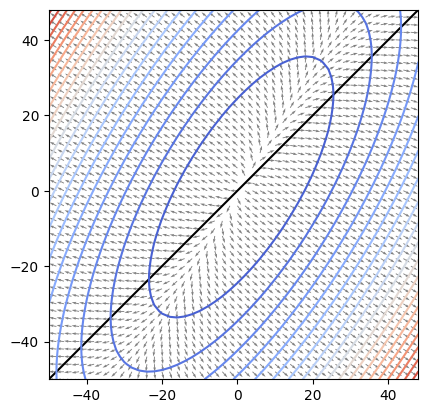

In [35]:
feature_x = np.arange(-50, 50, 2)
feature_y = np.arange(-50, 50, 2)
x, y = np.meshgrid(feature_x, feature_y)
z = 0.5*(y-x)**2 + 0.5*(1-x)**2
u = 2*x - y - 1
v = y - x
# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm
fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)
ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, u, v, units='xy', scale=0.5, color='gray')
ax.contour(x, y, z, levels=20, cmap="coolwarm")

**Definition 1.8.2** For a twice continuously differentiable function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ its ***Hessian Matrix*** is given by $H(f(x))$ and is defined at point $x$ in the n x n-dimensional space as the matrix of the second order partial derivatives:

$H\big(f(x)\big)=\frac{\partial^2 f}{\partial_{x_i}\partial_{x_j}} = \left(\array{
\frac{\partial^2 f}{\partial x_1^2},& \frac{\partial^2 f}{\partial x_1\partial x_2},& \cdots,& \frac{\partial^2 f}{\partial x_1\partial x_n}\\
\frac{\partial^2 f}{\partial x_2 \partial x_1},& \frac{\partial^2 f}{\partial x_2^2},& \cdots,& \frac{\partial^2 f}{\partial x_2\partial x_n}\\
\vdots,& \vdots,& \ddots,& \vdots\\
\frac{\partial^2 f}{\partial x_n\partial x_1},& \frac{\partial^2 f}{\partial x_n\partial x_2},& \cdots,& \frac{\partial^2 f}{\partial x_n^2}
}\right) \qquad (1.8.2)$


**Example** Consider an objective function $f(x)=2x_1x_2^3 + 3x_2^2x_3 + x_3^3x_1$.\
$\Box$ Find out the gradient vector $\triangledown f(x)$ and the hessian $H(f(x))$ at point $P(1,2,3)$

The gradient vector is:\
$\triangledown f(x)=\left[\array{
2x_2^3& + x_3^3\\
6x_1x_2^2& + 6x_2x_3&\\
3x_2^2& + 3x_3^2x_1&\\
}\right]$

So $\triangledown f(x)|_P = \left[\array{43\\60\\39}\right]$

The hessian matrix is therefore given by:\
$H(f(x))=\left[\array{
0& 6x_2^2& 3x_3^3\\
6x_2^2& 12x_1x_2 + 6x_3& 6x_x\\
3x_3^2& 6x_2& 6x_3x_1\\
}\right]$

At point $P$, $H(f(x))|_P=\left[\array{
0& 24& 27\\
24& 42& 12\\
27& 12& 18\\
}\right]$

In [2]:
# Numerical Solution
# Initial value at point P
P = np.array([1,2,3], dtype=float)
# Objective function
f=lambda x: 2*x[0]*x[1]**3 + 3*x[1]**2*x[2] + x[2]**3*x[0]
grad_f = grad(f)
hes_f = jacobian(grad_f)
print("Gradient vector\n", grad_f(P))
print("Hessian matrix\n", hes_f(P))

Gradient vector
 [43. 60. 39.]
Hessian matrix
 [[ 0. 24. 27.]
 [24. 42. 12.]
 [27. 12. 18.]]


### 1.9 Directional Derivative of Objective Function
**Definition 1.9.1** The real valued objective function $f(x)$ and a feasible direction $\delta$, the directinal derivative of f(x) in the direction \delta is:

\begin{align}
\frac{\partial f}{\partial \delta}(x) = \underset{\alpha \rightarrow 0}{lim} \frac{f(x + \alpha\delta) - f(x)}{\alpha}
\end{align}
Where:\
$\qquad ||\delta|| =  1$


For $x \in \mathbb{R}^n$, consider the differential equation:

\begin{align}
df(x) &=\frac{\partial f(x)}{\partial x_1} dx_1 + \cdots + \frac{\partial f(x)}{\partial x_n}dx_n\\
&= \triangledown^T f(x)dx\\
&= \langle \triangledown f(x), dx \rangle
\end{align}

Where $\langle .,.\rangle$ denotes the dot product between two matrices and/or vectors. Consider a function $\hat{f}(x)=f(\hat{x} + \alpha \delta)$, such that for a point x passing through the point $\hat{x}$ in the direction $\delta$ is given by $x(\alpha) = \hat{x} + \alpha \delta$. For an infinitesimal change $d\alpha$, we have $dx=\delta d\alpha$. Thus the differential at point x in the given direction $d\hat{f}=\triangledown^T f(x)\delta d \alpha$. So the directional derivative can be written as:

\begin{align}
\frac{\partial f}{\partial \alpha}(x)=\frac{d}{d\alpha}f(x+\alpha \delta)|_{\alpha=0}=\triangledown^Tf(x)\delta
\end{align}

**Example** Consider $f(x)=2x_1x_2^3 + 3x_2^2x_3 + x_3^3x_1$\
$\Box$ Find the gradient vector $\triangledown^Tf(x)$ at point P(1,2,3) and then\
$\Box$ Calculate directional derivative in the direction $\delta=(\frac{1}{\sqrt{35}}, \frac{3}{\sqrt{35}}, \frac{5}{\sqrt{35}})$

In [4]:
p=np.array([1,2,3], dtype=float)
delta=np.array([1/np.sqrt(35),3/np.sqrt(35),5/np.sqrt(35)], dtype=float)
# objective function
f=lambda x: 2*x[0]*x[1]**3 + 3*x[1]**2*x[2] + x[2]**3*x[0]
grad_f = grad(f)
print("Directional derivative:\n", grad_f(p).dot(delta))

Directional derivative:
 70.65489569530399


### 1.10 Positive Definite and Positive Semi Definite Matrices
**Definition 1.10.1** A real matrix $M \in \mathbb{R}^{NxN}$ is a positive definite matrix if for any real vector $v \in \mathbb{R}^n$ other than the null vector, the ff. is satisfied:

\begin{align}
v^TMv \gt 0
\end{align}

**Definition 1.10.2** A real matrix $M \in \mathbb{R}^{NxN}$ is a positive semi-definite matrix if for any real vector $v \in \mathbb{R}^n$, the ff. is satisfied:

\begin{align}
v^TMv \geq 0
\end{align}

**Theorem 1.10.1** All the eigenvalues of positive definite matrix are positive.
**Proof** If \lambda be an eigenvalue (real) of $M$ and $v$ the corresponding eigenvector, then we have the following well known equation:

\begin{align}
Mv = \lambda v
\end{align}

Multiplying the equation $v^T$ on the left, we get the ff.

\begin{align}
v^TMv &= \lambda v^Tv\\
&=\lambda ||v^2||
\end{align}

The left hand side is positive as $M$ is positive definite and $||bmv||^2$ is positive too. This implies that $\lambda$ is positive.

The above proof can be extended to positive semi-definite matrix in which case the eigenvalues are non-negative,i.e, either $0$ or positive and we will exploit these properties numerically to check for positive definiteness or positive semi-definiteness of a matrix.

Consider the following matrices and check for positive definite, positive semi-definite, negative definite.

$\left[\array{
2& -1& 0\\
-1& 2& -1\\
0& -1& 2
}\right]$

$\left[\array{
-2& 4\\
4& -8\\
}\right]$

$\left[\array{
-2& 2\\
2& -4\\
}\right]$


In [21]:
M = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]], dtype=float)
#M = np.array([[-2,4],[4,-8]], dtype=float)
#M = np.array([[-2,2],[4,-4]], dtype=float)
eigs = np.linalg.eigvals(M)
print("Eigenvalues of M: ", eigs)
if np.all(eigs>0):
    print("M is positive-definite")
elif np.all(eigs >=0):
    print("M is positive semi-definite")
else:
    print("M is negative-definite")

Eigenvalues of M:  [3.41421356 2.         0.58578644]
M is positive-definite


### 1.11 Convexity
**Definition 1.11.1** A set $X \subset \mathbb{R}^n$ is said to be a convex set if $\forall x,y \in X$ and $\alpha \in [0,1]$ the following is satisfied:

\begin{align}
(1-\alpha)x + \alpha y\in X
\end{align}

if the above condition is note satisfied, the set is a non-convex set.

**Definition 1.11.2** A function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ is called a convex function if for every two points $x,y \in \mathbb{R}^n$ and $\alpha \in [0,1]$, the following condition is satisfied:

\begin{align}
f\big(\alpha x + (1 - \alpha)y \big) \leq \alpha f(x) + (1-\alpha)f(y) \qquad (1.11.2)
\end{align}

**Definition 1.11.3** A function is strictly convex if $\leq$ symbol is replaced by $\lt$. In the similar way, one can define a concave function too.

**Definition 1.11.4** A constrained optimization problem is called convex programming problem if the following properties are satisfied:

- the objective function is convex
- the equality constraint functions $h_k(x)$ are linear
- the inquality constraint functions $g_k(x)$ are concave.

This concept of convexity is used in practically solving optimization problems in the real world. Not to test for convexity of $f(x)$, we study the two following theorems:

**Theorem 1.11.1** if $f(x)$  is a differentiable objective function defined over the convex set $S \subset \mathbb{R}^n$ then for all $y,z \in S, f(x)$ is convex over $S$ if and only if $f$:

\begin{align}
f(y) + \triangledown^Tf(y)(z-y) \leq f(z) \qquad (1.11.3)
\end{align}

**Proof** The function $f(x)$ is convex over S implies that for all $y,z \in S$ and for all $\alpha \in [0,1]$, the following equation holds:

\begin{align}
f(\alpha z + (1 -\alpha)y) \leq \alpha f(y) + (1-\alpha)f(y)
\end{align}

implying,

\begin{align}
\frac{f(y + \alpha(z-y)) - f(y)}{\alpha} \leq f(z) -f(y)
\end{align}

Now the difference inequality can be turned into a differential inequality by taking the $lim_{\alpha \rightarrow 0}$

\begin{align}
\frac{df(y)}{d\alpha}|_{y-z} \leq f(z) -f(y)
\end{align}

The LHS is the directional derivative and thus from (1.9.3), this can be written as:

\begin{align}
\frac{df(y)}{d\alpha}|_{y-z} = \triangledown^T f(x)(z-y)
\end{align}

From **(1.11.2)** and **(1.11.3)** the following inequality can be written as $f(y) + \triangledown^T f(y)(z-y) \leq f(z)$. Now, to work on the other way round, if theorem (1.10,1) is true, then for $x=\alpha z + (1-\alpha)y \in S$ and $\alpha \in [0,1]$ we will have the following inqualities:

\begin{align}
f(x) + \triangledown^T f(x)(z-x) \leq f(z) \qquad (1.11.8)
\end{align}

and

\begin{align}
f(x) + \triangledown^T f(x)(y-x) \leq f(y) \qquad (1.11.9)
\end{align}

Now

\begin{align}
((1.11.8) x \alpha) + (1.11.9) x (1-\alpha)) \longrightarrow\\
\alpha f(z) + (1-\alpha)f(x) \leq \alpha f(z) + (1-\alpha)f(y) - f(x)
\end{align}

The LHS is 0 and since $\alpha(z-x) + (1-\alpha)(y-x) = 0$.

So, we get:

\begin{align}
f(x) = f(\alpha z + (1-\alpha)y) \leq \alpha f(z) + (1-\alpha)f(y)
\end{align}

The converse relation is also satisfied, which completes the proof.

**Theorem 1.11.2** If $f(x)$ is defined over an open convex set $S \subset \mathbb{R}^n$ and if the Hessian matrix $Hf(x)$ is positive definite for all $z \in S$, then $f(x)$ is strictly convex over the set $S$.

**Proof** Let $x,y \in S$. Using Taylor expansion, the function $f(y)$ can be written as

\begin{align}
f(y)&=f(x + (y-x))\\
&=f(x) + \triangledown^Tf(x)(y-x) + \frac{1}{2}(y-x)^TH(f(x+\alpha (y-x))(y-x)
\end{align}

where:
$\quad \alpha \in [0,1]$

Now, the positive definite Hessian matrix implies that $f(y) \gt f(x) + \triangledown^T f(x)(y-x)$. From Theorem (1.11.1), it can be said that $f(x)$ is strictly convex, thus proving the theorem.


### 1.12 Numerical Optimization Algorithm
Optimization algorithms are iterative techniques that generally follow the fundamental steps below:

- Initialize with a guess of the decision variables $x$.
- Iterate through the process of generating a list of improving estimates.
- Check whether the terminating conditions are met, and the estimates will be probably stop at the solution point $x^*$.

Most optimization strategies  make use of either the objective function or constraint functions g(x) or h(x), the first or second derivatives of these functions, information collected during previous iterations and/or local information gathered at the present point. Properties of stable optimization algorithms:

- Robustness: For all initial points chosen, algorithm should operate on broad range of problems.
- Efficiency: The time and space complexity should be practical.
- Accuracy: The result should be precise to the expected value.